# Exploratory Data Analysis
### Understanding the ERA5 Data

ERA5 is the fifth iteration of the ECMWF atmospheric reanalysis of the global climate.

##### Running this notebook
Use the same python kernel which is used for running modules. Ensure that the required jupyter packages are installed (these are specified in requirements.txt).

In [1]:
import sys
from pathlib import Path

# Make project root importable
ROOT = Path().resolve().parents[1]
sys.path.append(str(ROOT))

In [2]:
from src.config.env_loader import *

In [3]:
# environmental variables

DATA_HOME = get_env_var("DATA_HOME") # must be set in .env file
ERA5_PATH_SUFFIX = "era5"  # subdirectory for ERA5 data within DATA_HOME.

ERA5_DATA_PATH = os.path.join(DATA_HOME, ERA5_PATH_SUFFIX) # set this to a custom path if needed

In [4]:
from src.data_processing.era5_processor import ProcessERA5
from src.data_processing.topology_processor import ProcessTopography
import xarray as xr

In [5]:
# confirm that the ERA5 data loads correctly
ds_surface  = ProcessERA5().load_ds(mode="surface")
ds_pressure = ProcessERA5().load_ds(mode="pressure")

# confirm that the topography data loads correctly
ds_topo = ProcessTopography().load_ds()

['/mnt/hdd/niwa/baseline_ConvGNP/data/era5/surface/2020/01/ERA5_20200102_surface.nc', '/mnt/hdd/niwa/baseline_ConvGNP/data/era5/surface/2020/01/ERA5_20200101_surface.nc']
['/mnt/hdd/niwa/baseline_ConvGNP/data/era5/pressure/2020/01/ERA5_20200101_pressure.nc', '/mnt/hdd/niwa/baseline_ConvGNP/data/era5/pressure/2020/01/ERA5_20200102_pressure.nc']


In [6]:
print(ds_surface)

<xarray.Dataset> Size: 5MB
Dimensions:           (valid_time: 48, latitude: 73, longitude: 61)
Coordinates:
  * valid_time        (valid_time) datetime64[ns] 384B 2020-01-01 ... 2020-01...
  * latitude          (latitude) float64 584B -32.0 -32.25 ... -49.75 -50.0
  * longitude         (longitude) float64 488B 165.0 165.2 165.5 ... 179.8 180.0
    number            int64 8B 0
    expver            (valid_time) <U4 768B dask.array<chunksize=(24,), meta=np.ndarray>
Data variables:
    wind_u_component  (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    wind_v_component  (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    d2m               (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    temperature       (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    lsm               (valid

In [7]:
print(ds_pressure)

<xarray.Dataset> Size: 56MB
Dimensions:           (valid_time: 48, pressure_level: 11, latitude: 73,
                       longitude: 61)
Coordinates:
  * valid_time        (valid_time) datetime64[ns] 384B 2020-01-01 ... 2020-01...
  * pressure_level    (pressure_level) float64 88B 100.0 70.0 50.0 ... 2.0 1.0
  * latitude          (latitude) float64 584B -32.0 -32.25 ... -49.75 -50.0
  * longitude         (longitude) float64 488B 165.0 165.2 165.5 ... 179.8 180.0
    number            int64 8B 0
    expver            (valid_time) <U4 768B dask.array<chunksize=(24,), meta=np.ndarray>
Data variables:
    z                 (valid_time, pressure_level, latitude, longitude) float32 9MB dask.array<chunksize=(24, 11, 73, 61), meta=np.ndarray>
    r                 (valid_time, pressure_level, latitude, longitude) float32 9MB dask.array<chunksize=(24, 11, 73, 61), meta=np.ndarray>
    q                 (valid_time, pressure_level, latitude, longitude) float32 9MB dask.array<chunksize=(24, 11,

In [8]:
print(ds_topo)

<xarray.Dataset> Size: 479MB
Dimensions:    (lat: 10938, lon: 10937)
Coordinates:
  * lat        (lat) float32 44kB -48.0 -48.0 -48.0 -48.0 ... -34.0 -34.0 -34.0
  * lon        (lon) float32 44kB 166.0 166.0 166.0 166.0 ... 180.0 180.0 180.0
Data variables:
    elevation  (lat, lon) float32 479MB ...
Attributes:
    crs:          EPSG:4326
    nodata:       nan
    institution:  Bodeker Scientific
    author:       Greg Bodeker / William Naylor
    email:        greg@bodekerscientific.com
    created:      2023-11-08 03:54:55 UTC
    script:       topo_convert_L8m.py
    conda_env:    The conda environment as at the time of committing the abov...
    script_sha:   7cc03c50847619e02211950c9204a30f4c6b205f


In [9]:
date = "2020-01-02T22:00"

<xarray.Dataset> Size: 5MB
Dimensions:           (valid_time: 48, latitude: 73, longitude: 61)
Coordinates:
  * valid_time        (valid_time) datetime64[ns] 384B 2020-01-01 ... 2020-01...
  * latitude          (latitude) float64 584B -32.0 -32.25 ... -49.75 -50.0
  * longitude         (longitude) float64 488B 165.0 165.2 165.5 ... 179.8 180.0
    number            int64 8B 0
    expver            (valid_time) <U4 768B dask.array<chunksize=(24,), meta=np.ndarray>
Data variables:
    wind_u_component  (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    wind_v_component  (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    d2m               (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    temperature       (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    lsm               (valid

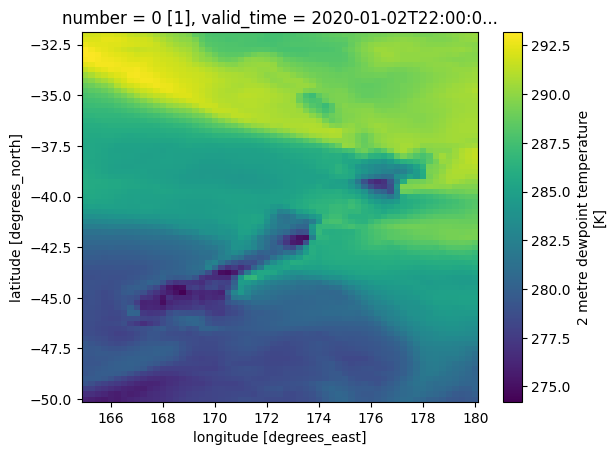

In [10]:
print(ds_surface)

# u10: wind u component at 10m
# v10: wind v component at 10m
# d2m: dew point temperature at 2m
# t2m: temperature at 2m
# lsm: land sea mask
# msl: mean sea level pressure

ds_surface.sel(valid_time=date)['d2m'].plot()

In [12]:
#ds_pressure.sel(valid_time="2020-01-02T22:00")['u'].isel(pressure_level=0).plot()

KeyboardInterrupt: 

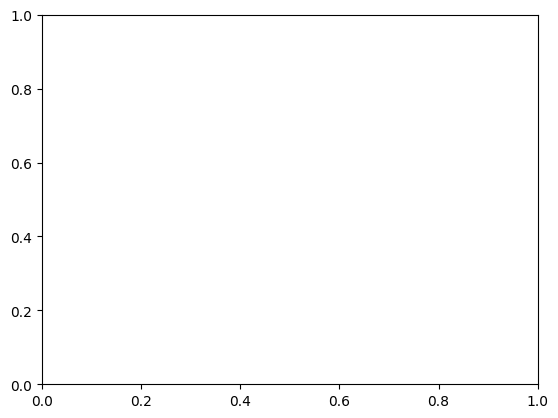

In [13]:
# plot topography
ds_topo['elevation'].plot()

#### Stations (sensors)

In [ ]:
filepath_home = os.path.join(get_env_var('DATA_HOME'),
                                         get_env_var('STATION_SUFFIX'))

In [ ]:
test_sensor = xr.open_dataset(os.path.join(filepath_home, '1001.nc'))

In [ ]:


print(unique_years)

[np.int64(1961), np.int64(1962), np.int64(1963), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987)]


In [ ]:
files = os.listdir(filepath_home)

unique_sensor_readings = []
years = [] # form a histogram of years with data

for f in files:
    if f.endswith('.nc') is False:
        continue
    
    load_sensor_file = os.path.join(filepath_home, f)
    sensor_data = xr.open_dataset(load_sensor_file)


    unique_sensor_readings.extend(list(sensor_data.data_vars))
    years.extend(set(sensor_data.time.dt.year.values))

unique_sensor_readings = set(unique_sensor_readings)

(array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  4.,  4.,  4.,
         4.,  3.,  3.,  3.,  9., 11., 11., 12., 12., 10., 11., 11., 10.,
         8.,  7.,  8.,  7.,  6.,  6.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
         5.,  6.,  5.,  8.,  7.,  7.,  7.,  7.,  9., 12., 14., 14., 14.,
        13., 12., 12., 12., 11., 11., 10., 11., 11., 11., 22.]),
 array([1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
        1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
        1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
        1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
        1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
        2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.,
        2024.]),
 <BarContainer object of 63 artists>)

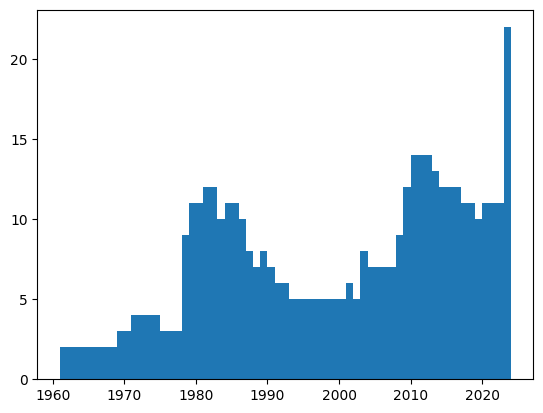

In [ ]:
import matplotlib.pyplot as plt
plt.hist(years, bins=(len(set(years))-1))

In [ ]:
unique_sensor_readings

{'dataset_version',
 'dewpoint',
 'dry_bulb',
 'dry_bulb_reliability',
 'latitude',
 'longitude',
 'orig_dry_bulb',
 'orig_wet_bulb',
 'relative_humidity',
 'station_height',
 'wet_bulb',
 'wet_bulb_reliability'}